In [57]:
import numpy as np
import operator
import matplotlib.pyplot as plt
from keras.datasets import mnist
from sklearn.neighbors import KNeighborsClassifier

In [58]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
size = 10000  # 测试集大小

x_train = x_train[0:size].reshape([-1, 28 * 28])  #x_train本来是10000x28x28的数组，把它转换成10000x784的二维数组
x_test = x_test.reshape([size, 28 * 28])  #和上面是同一个意思

y_train = y_train[0:size]  # 截取10000个样本

x_train = x_train / 255  # x_train之前的灰度值最大为255，最小为0，这里将它们进行特征归约，变成了在0到1之间的小数
x_test = x_test / 255

In [59]:
# 定义kNN分类器，并且对kNN算法进行训练
knn = KNeighborsClassifier()
#mnist数据集较大，kNN算法计算复杂度高，所以选用10000个样本数据集进行训练
knn.fit(x_train, y_train)

#计算模型的得分
print('模型在训练集上的得分:%f' % knn.score(x_train, y_train))
print('模型在测试集上的得分:%f' % knn.score(x_test, y_test))

模型在训练集上的得分:0.966900
模型在测试集上的得分:0.944200
模型在训练集上的得分:0.966900
模型在测试集上的得分:0.944200


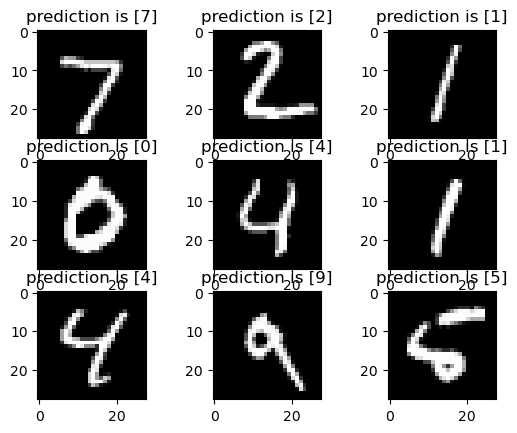

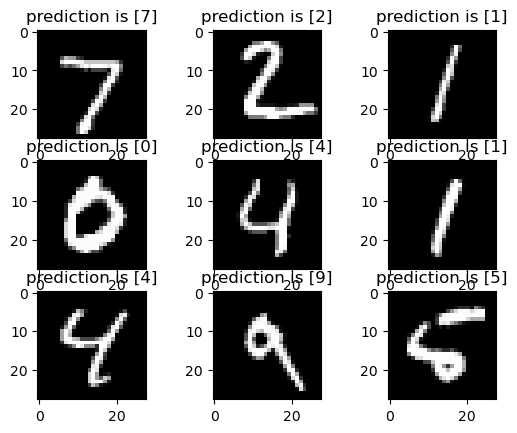

In [60]:
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.title("prediction is " + str(knn.predict([x_test[i]])))
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
plt.show()  # 从个别预测结果得出，模型的准确性不错

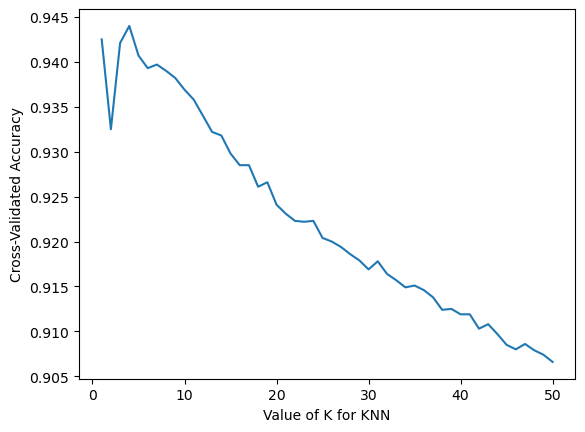

In [63]:
from sklearn.model_selection import cross_val_score

# k值从1-51变化时，平均准确率的可视化
k_range = range(1, 51)
k_scores = []
max_score = 0
index = 0
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    # 选取10000个数字图片
    scores = cross_val_score(knn, x_train[:10000], y_train[:10000], cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
    if max_score < scores.mean():
        max_score = scores.mean()
        index = k
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [64]:
print(max_score, index)

0.944 4


In [62]:
# def classify0(inX, dataSet, labels, k):
#     m = dataSet.shape[0]  #返回dataSet的行数，即已知数据集中的所有点的数量
#     diffMat = np.tile(inX, (m, 1)) - dataSet  #行向量方向上将inX复制m次，然后和dataSet矩阵做相减运算
#     sqDiffMat = diffMat ** 2  #减完后，对每个数做平方
#     sqDistances = sqDiffMat.sum(axis=1)  #平方后按行求和，axis=0表示列相加,axis=1表示行相加
#     distances = sqDistances ** 0.5  #开方计算出欧式距离
#     sortedDistIndices = distances.argsort()  #对距离从小到大排序，注argsort函数返回的是数组值从小到大的索引值
#     classCount = {}  #用于类别/次数的字典，key为类别，value为次数
#     for i in range(k):
#         voteIlabel = labels[sortedDistIndices[i]]  #取出第i近的元素对应的类别
#         classCount[voteIlabel] = classCount.get(voteIlabel, 0) + 1  #对类别次数进行累加
#     sortedClassCount = sorted(classCount.items(), key=operator.itemgetter(1), reverse=True)  #根据字典的值从大到小排序
#     return sortedClassCount[0][0]  #返回次数最多的类别，即所要分类的类别